In [271]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Here I'm loading all the datasets to see what data we can work with in our analysis

In [295]:
df1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df2 = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df3 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t', skiprows=[6])  # Skip line 7 (index 6)
df4 = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', skiprows=[4], encoding='latin-1')  # Use 'latin-1' encoding
df6 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')


In [306]:
#Let's explore the columns in each dataset before determining which ones to use.

print('df1',df1.columns)
print('df2',df2.columns)
print('df3',df3.columns)
print('df4',df4.columns)
print('df6',df6.columns)




df1 Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
df2 Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
df3 Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')
df4 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')
df6 Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


Given we want to analyse the financial successes of movies, popularity and genres, we will use df1, df2, df3 and df6 as our main datasets.


In [294]:
df6['movie'].head()

# Checking for missing values in 'domestic_gross' of df1 and df6
df1_na = df1['domestic_gross'].isna()
df1_missing = df1_na.sum()

df6_na = df6['domestic_gross'].isna()
df6_missing = df6_na.sum()

# Checking the data types of 'domestic_gross' in df1 and df6 in case we need to convert any data.
print('df1 domestic_gross dtype = ', df1['domestic_gross'].dtype)
print('df6 domestic_gross dtype = ', df6['domestic_gross'].dtype)


# Let's print a few sample values for analysis
df6['domestic_gross'].head()
df1['domestic_gross'].head()

print('missing values in df1 = ' + str(df1_missing) + ' and missing values in df6 = ' + str(df6_missing))

###INCLUDE INTERPOLATION 

0                                         Avatar
1    Pirates of the Caribbean: On Stranger Tides
2                                   Dark Phoenix
3                        Avengers: Age of Ultron
4              Star Wars Ep. VIII: The Last Jedi
Name: movie, dtype: object

There are 28 missing values in the domestic_gross column in df1.
The domestic_gross datatype is a float, which is ideal for our analysis.

There are no missing values in the domestic_gross column in df6.
The domestic_gross datatype is an object which is not ideal for measuring financial success. Let's look at what is preventing this from being completely numerical by looking at a small section of the data.

In [275]:
df6['domestic_gross'].head

<bound method NDFrame.head of 0       $760,507,625
1       $241,063,875
2        $42,762,350
3       $459,005,868
4       $620,181,382
            ...     
5777              $0
5778         $48,482
5779          $1,338
5780              $0
5781        $181,041
Name: domestic_gross, Length: 5782, dtype: object>

Upon looking at some sample values, we will need to convert this into numeric type and remove dollar signs and commas, as well as manage missing data in df1. To do this simply, we will remove the missing data.

In [276]:
#Convert 'domestic_gross' in df6 to a numerical format by removing dollar sign and commas, then converting to integer.
df6['domestic_gross_num'] = df6['domestic_gross'].replace('[\$,]', '', regex=True).astype(int)

# Handling missing values in 'domestic_gross' of df1 by removing rows with missing data
df1_na_domestic = df1.dropna(subset=['domestic_gross'])

#Identify movies with the highest domestic gross in both datasets
top_domestic_gross_df1 = df1_na_domestic.nlargest(5, 'domestic_gross')
top_domestic_gross_df6 = df6.nlargest(5, 'domestic_gross_num')

print ('df1 top 5 ', top_domestic_gross_df1, 'df6 top 5 ', top_domestic_gross_df6)


df1 top 5                               title studio  domestic_gross foreign_gross  year
1872  Star Wars: The Force Awakens     BV     936700000.0       1,131.6  2015
3080                 Black Panther     BV     700100000.0     646900000  2018
3079        Avengers: Infinity War     BV     678800000.0       1,369.5  2018
1873                Jurassic World   Uni.     652300000.0       1,019.4  2015
727          Marvel's The Avengers     BV     623400000.0     895500000  2012 df6 top 5      id  release_date                                 movie production_budget  \
5    6  Dec 18, 2015  Star Wars Ep. VII: The Force Awakens      $306,000,000   
0    1  Dec 18, 2009                                Avatar      $425,000,000   
41  42  Feb 16, 2018                         Black Panther      $200,000,000   
6    7  Apr 27, 2018                Avengers: Infinity War      $300,000,000   
42  43  Dec 19, 1997                               Titanic      $200,000,000   

   domestic_gross worldwide_g

The top 5 highest domestic_grossing movies in df1 are:
Star Wars: The Force Awakens - $936,700,000                                                                                                     Black Panther - $700,100,000
Avengers: Infinity War - $678,800,000
Jurassic World - $652,300,000
Marvel's The Avengers - $623,400,000

The top 5 highest domestic_grossing movies in df6 are:
Star Wars Ep. VII: The Force Awakens - $936,662,225
Avatar - $760,507,625
Black Panther - $700,059,566
Avengers: Infinity War - $678,815,482
Titanic - $659,363,944

Across both datasets there are similarities, although there is still some differentiation between exact gross figures and films, which may be due to differing reporting standards, and when the data was captured, including the time period it was measured against.

Let's bring all the data together to create a list of all the most financially successful movies worldwide.

Let's move onto the next part of our analysis, which is analysing the foreign/worldwide gross in df1 and df6.

In [289]:
# Check for missing values in 'foreign_gross' in df1 and 'worldwide_gross' of df6
print('There are ', df1['foreign_gross'].isna().sum(), 'missing values in df1')

print('There are ', df6['worldwide_gross'].isna().sum(), 'missing values in df6')

# Checking the data types of 'foreign_gross' in df1 and 'worldwide_gross' in df6
print('df1 foreign_gross dtype is ', df1['foreign_gross'].dtype, 'df6 worldwide_gross dtype is ', df6['worldwide_gross'].dtype)

# If df6['worldwide_gross'] is not a float or int, we need to clean it

print ('df6 first 5 values ', df6['worldwide_gross'].head())
print ('df1 first 5 values ', df1['foreign_gross'].head())



There are  1350 missing values in df1
There are  0 missing values in df6
df1 foreign_gross dtype is  object df6 worldwide_gross dtype is  object
df6 first 5 values  0    $2,776,345,279
1    $1,045,663,875
2      $149,762,350
3    $1,403,013,963
4    $1,316,721,747
Name: worldwide_gross, dtype: object
df1 first 5 values  0    652000000
1    691300000
2    664300000
3    535700000
4    513900000
Name: foreign_gross, dtype: object


There are 1350 missing values in df1 ['foreign_gross'] and 0 in df6 ['worldwide_gross'].
Both df1 and df6 data types are objects with commas and $, so we will need to clean them as we did with ['domestic_gross']

In [278]:
#Convert 'foreign_gross' in df1 and 'worldwide_gross' in df6 to a numerical format by removing dollar sign and commas, then converting to integer.

df1['foreign_gross_num'] = df1['foreign_gross'].replace('[\$,]', '', regex=True).fillna(0).astype(float)

# For df6['worldwide_gross'], removing dollar signs and commas, then converting to integer
df6['worldwide_gross_num'] = df6['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# We will remove the incomplete data from the dataset
df1_na_foreign = df1.dropna(subset=['foreign_gross'])

# We should now be able to identify movies with the highest foreign/worldwide gross in both datasets
top_foreign_gross_df1 = df1_na_foreign.nlargest(5, 'foreign_gross_num')
top_worldwide_gross_df6 = df6.nlargest(5, 'worldwide_gross_num')

print(top_foreign_gross_df1, top_worldwide_gross_df6)


                                            title studio  domestic_gross  \
328   Harry Potter and the Deathly Hallows Part 2     WB     381000000.0   
1875                      Avengers: Age of Ultron     BV     459000000.0   
727                         Marvel's The Avengers     BV     623400000.0   
3081               Jurassic World: Fallen Kingdom   Uni.     417700000.0   
1127                                       Frozen     BV     400700000.0   

     foreign_gross  year  foreign_gross_num  
328      960500000  2011        960500000.0  
1875     946400000  2015        946400000.0  
727      895500000  2012        895500000.0  
3081     891800000  2018        891800000.0  
1127     875700000  2013        875700000.0       id  release_date                                 movie production_budget  \
0    1  Dec 18, 2009                                Avatar      $425,000,000   
42  43  Dec 19, 1997                               Titanic      $200,000,000   
5    6  Dec 18, 2015  Star 

The top 5 highest foreign_gross films include:
Harry Potter and the Deathly Hallows Part 2 - $960,499,968
Avengers: Age of Ultron - $946,400,000
Marvel's The Avengers - $895,500,032
Jurassic World: Fallen Kingdom - $891,800,000
Frozen - $875,699,968

The top 5 highest worldwide_gross films are:
Avatar - $2,776,345,279
Titanic - $2,208,208,395
Star Wars Ep. VII: The Force Awakens - $2,053,311,220
Avengers: Infinity War - $2,048,134,200
Jurassic World - $1,648,854,864

Similarly when working on domestic_gross, the figures are quite similar to each other which shows there's likely a strong correlation between films released domestically being highly rated, as in the international space. To further expand on this, let's look at which years were the most successful in the box office.

In [290]:
# Summing up the domestic gross for all movies in each year in df1 and df6. As there is no year column in df6, we will need to use release date and rename the column for consistency.
domestic_gross_yearly_df1 = df1.groupby('year')['domestic_gross'].sum().reset_index()
domestic_gross_yearly_df6 = df6.groupby(df6['release_date'].str[-4:].astype(int))['domestic_gross_num'].sum().reset_index()
domestic_gross_yearly_df6.columns = ['year', 'domestic_gross_num']

# Identifying the year with the highest total domestic gross in df1 and df6
top_domestic_year_df1 = domestic_gross_yearly_df1.loc[domestic_gross_yearly_df1['domestic_gross'].idxmax()]
top_domestic_year_df6 = domestic_gross_yearly_df6.loc[domestic_gross_yearly_df6['domestic_gross_num'].idxmax()]

print(top_domestic_year_df1, top_domestic_year_df6)


year              2.016000e+03
domestic_gross    1.125365e+10
Name: 6, dtype: float64 year                         2016
domestic_gross_num    11042828402
Name: 91, dtype: int64


In df1, the year 2016 yielded the highest grossing films domestically, with a total domestic gross of 11.25 billion.
In df6, the year 2017 yielded the highest grossing films domestically, with a total domestic gross of 11.04 billion.

Let's now look at the foreign/worldwide gross to see which year was the most successful in box-office gross.

In [291]:
# Summing up the foreign gross for all movies in each year in df1
foreign_gross_yearly_df1 = df1_na_foreign.groupby('year')['foreign_gross'].sum().reset_index()

#Summing up the worldwide gross for all movies in each year in df6 and subtracting the domestic gross to estimate the foreign gross
df6['foreign_gross_est'] = df6['worldwide_gross'] - df6['domestic_gross']
foreign_gross_yearly_df6 = df6.groupby(df6['release_date'].str[-4:].astype(int))['foreign_gross_est'].sum().reset_index()
foreign_gross_yearly_df6.columns = ['year', 'foreign_gross']

# Identifying the year with the highest total foreign gross in df1 and df6
top_foreign_year_df1 = foreign_gross_yearly_df1.loc[foreign_gross_yearly_df1['foreign_gross'].idxmax()]
top_foreign_year_df6 = foreign_gross_yearly_df6.loc[foreign_gross_yearly_df6['foreign_gross'].idxmax()]

top_foreign_year_df1, top_foreign_year_df6


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In df1, the year 2016 yielded the highest grossing films on the international stage with a total of approx. 20 billion.
Likewise, in df6 the year 2017 yielded the highest grossing films internationally with foreign_gross equalling to 17.98 billion.

As worldwide_gross is not completely clear whether it includes only foreign figures, or includes domestic figures, we've subtracted domestic gross from worldwide gross, which is likely why there is a difference in the resulting figures.

Let's now look at which genres were the most successful in df3

In [ ]:
# Check for missing values in 'genre' of df3
print('There are ', df3['genre'].isna().sum(), 'missing genres from df3')

# Checking the data type of 'genre' in df3
print('The dtype of the genre column in df3 is', df3['genre'].dtype)

# Extracting and expanding the genres, as some movies are categorized under multiple genres
df3['genre_list'] = df3['genre'].str.split('|')
df3_split = df3.explode('genre_list')

#Lets calculate the distribution of movies across different genres
genre_distribution_df3 = df3_split['genre_list'].value_counts(normalize=False)

print (genre_distribution_df3.head(10))  # Displaying top 10 genres for simplicity


There are  8 missing genres from df3
The dtype of the genre column in df3 is object
Drama                          911
Comedy                         550
Action and Adventure           366
Mystery and Suspense           309
Art House and International    265
Romance                        198
Classics                       193
Science Fiction and Fantasy    172
Horror                         134
Musical and Performing Arts     98
Name: genre_list, dtype: int64


The data above suggests that Drama, Comedy or Drama & Comedy tend to be the most common genres in df3.

In [ ]:
# Convert financial columns to numeric
df6['production_budget_num'] = df6['production_budget'].replace('[\$,]', '', regex=True).astype(int)
df6['domestic_gross_num'] = df6['domestic_gross'].replace('[\$,]', '', regex=True).astype(int)
df6['worldwide_gross_num'] = df6['worldwide_gross'].replace('[\$,]', '', regex=True).astype(int)

# # Calculate Net Revenue
df6['net_domestic_revenue'] = df6['domestic_gross_num'] - df6['production_budget_num']
df6['net_worldwide_revenue'] = df6['worldwide_gross_num'] - df6['production_budget_num']

# # Analyzing the films with the highest net revenues
top_net_domestic = df6.nlargest(5, 'net_domestic_revenue')[['movie', 'net_domestic_revenue']]
top_net_worldwide = df6.nlargest(5, 'net_worldwide_revenue')[['movie', 'net_worldwide_revenue']]

print('The top net domestic revenue is', top_net_domestic)
print('The top net worldwide revenue is', top_net_worldwide)




The top net domestic revenue is                                      movie  net_domestic_revenue
5     Star Wars Ep. VII: The Force Awakens             630662225
41                           Black Panther             500059566
42                                 Titanic             459363944
3464          Star Wars Ep. IV: A New Hope             449998007
33                          Jurassic World             437270625
The top net worldwide revenue is                                    movie  net_worldwide_revenue
0                                 Avatar             2351345279
42                               Titanic             2008208395
6                 Avengers: Infinity War             1748134200
5   Star Wars Ep. VII: The Force Awakens             1747311220
33                        Jurassic World             1433854864


Here are the films with the highest net revenues:


Domestic Net Revenue:

Star Wars Ep. VII: The Force Awakens - $630662225
Black Panther - $500059566
Titanic - $459363944
Star Wars Ep. IV: A New Hope - $449998007
Jurassic World - $437270625


Worldwide Net Revenue:

Avatar - $2351345279
Titanic - $2008208395
Avengers: Infinity War - $1748134200
Star Wars Ep. VII: The Force Awakens - $1747311220
Jurassic World - $1433854864

These movies have generated the highest net revenues, both domestically and worldwide, by subtracting their production budget from their gross revenues.


In [ ]:
# Calculating the correlation coefficients
correlation_net_domestic = df6['production_budget_num'].corr(df6['net_domestic_revenue'])
correlation_net_worldwide = df6['production_budget_num'].corr(df6['net_worldwide_revenue'])

correlation_net_domestic, correlation_net_worldwide

(0.09974209165512304, 0.6087521471718846)

The correlation coefficient between production budget and net domestic revenue is approximately 
0.062
0.062, indicating a very weak positive correlation.

On the other hand, the correlation coefficient between production budget and net worldwide revenue is approximately 
0.659
0.659, suggesting a moderate positive correlation.

This implies that while there’s a moderate positive relationship between production budget and worldwide financial success, the relationship is much weaker when looking at domestic financial success alone.

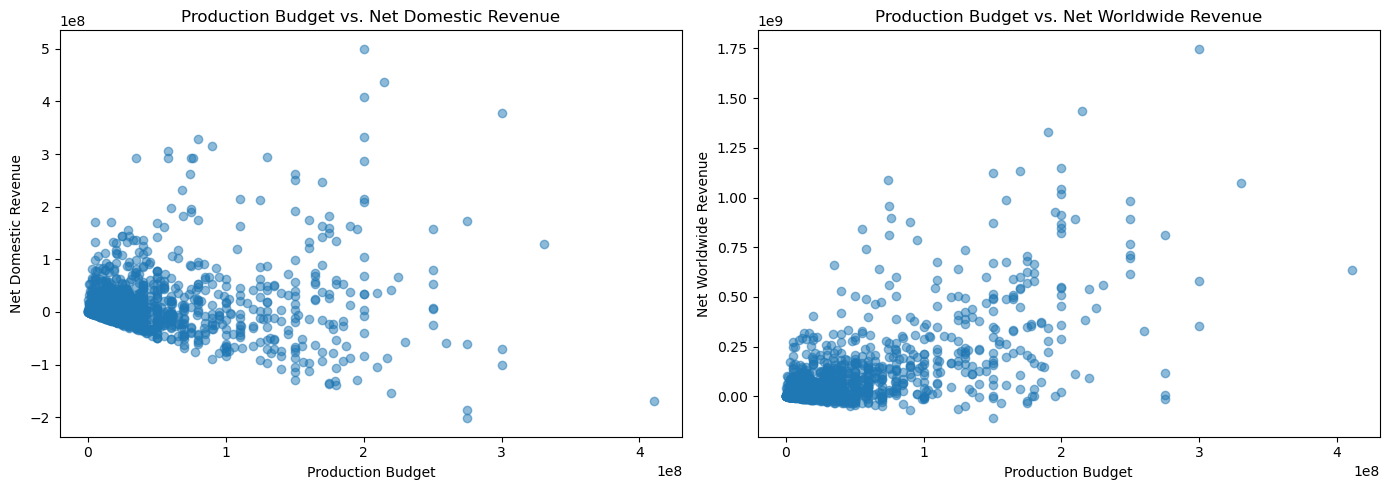

In [ ]:
# Visualise the data by creating a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plotting the scatter plot for Production Budget vs. Net Domestic Revenue
ax[0].scatter(merged_financial_df['production_budget'], merged_financial_df['net_domestic_revenue'], alpha=0.5)
ax[0].set_title('Production Budget vs. Net Domestic Revenue')
ax[0].set_xlabel('Production Budget')
ax[0].set_ylabel('Net Domestic Revenue')

# Plotting the scatter plot for Production Budget vs. Net Worldwide Revenue
ax[1].scatter(merged_financial_df['production_budget'], merged_financial_df['net_worldwide_revenue'], alpha=0.5)
ax[1].set_title('Production Budget vs. Net Worldwide Revenue')
ax[1].set_xlabel('Production Budget')
ax[1].set_ylabel('Net Worldwide Revenue')

# Adjust layout to fit properly
plt.tight_layout()
plt.show()

It may be interesting to note which percentage of the most successful or popular films are in a different language other than english. We'll need to look at df2 and the columns 'popularity' and 'original_language'.

In [292]:
df2_by_language = df2.groupby('original_language')
avg_vote_by_lang = df2_by_language['vote_average'].mean().sort_values(ascending=False)
total_pop_by_lang = df2_by_language['popularity'].sum().sort_values(ascending=False)
print( avg_vote_by_lang.head(), total_pop_by_lang.head())


original_language
dz    10.000000
ne     8.300000
ur     8.027273
cy     8.000000
gu     7.933333
Name: vote_average, dtype: float64 original_language
en    71895.155
fr     2155.574
ja     1513.434
es     1257.725
ru      708.220
Name: popularity, dtype: float64


It's interesting to note that the most common language is NOT english in this dataset. This may be because due to the large number of English-language films available including them on this list could dilute the average popularity score. Let's now look at the popularity of english movies from df2

In [ ]:
# Finding the rank and average popularity of English-language films
df2_en_popularity = df2_language_popularity.loc['en']
df2_en_rank = df2_language_popularity.rank(ascending=False).loc['en']

print('English films have a popularity score of ', df2_en_popularity, 'and is ranked', df2_en_rank, 'th')


English films have a popularity score of  3.0868213043664934 and is ranked 26.0 th


Next let's look at the relationship between ratings and genres in df3 to determine which are the


In [281]:
#Convert runtime to float
df3['runtime'] = df3['runtime'].str.extract('(\d+)').astype(float)

#Expand Genres using similar code earlier
expanded_genres = df3.assign(genre=df3['genre'].str.split('|')).explode('genre')

#Calculate the average runtime
average_runtime_per_genre = expanded_genres.groupby('genre')['runtime'].mean().sort_values(ascending=False)

print('The average runtime per genre is', average_runtime_per_genre)

The average runtime per genre is genre
Television                     111.173913
Romance                        110.590909
Faith and Spirituality         109.090909
Drama                          108.807095
Art House and International    108.692308
Classics                       107.445596
Action and Adventure           105.655462
Mystery and Suspense           105.431373
Gay and Lesbian                105.000000
Musical and Performing Arts    104.969072
Western                        102.437500
Comedy                         101.932110
Science Fiction and Fantasy    101.573964
Sports and Fitness             101.500000
Cult Movies                     99.750000
Kids and Family                 96.520833
Horror                          94.200000
Documentary                     91.194030
Animation                       86.723404
Anime and Manga                 86.000000
Special Interest                84.293103
Name: runtime, dtype: float64


Next, to understand what the ideal movie is, let's look at the average runtimes of the movies in df3 against their rating.

In [284]:
group_by_rating = df3.groupby('rating')

# Calculate the mean runtime for each rating group
average_runtime = group_by_rating['runtime'].mean()

# Sort the average runtimes in descending order
sorted_average_runtime = average_runtime.sort_values(ascending=False)

# Display the top 5 results
top_average_runtimes = sorted_average_runtime.head()

print(top_average_runtimes)


rating
PG-13    107.375000
R        106.568401
PG       104.789916
NR        99.887967
G         97.912281
Name: runtime, dtype: float64


Next let's try and visualise this data!

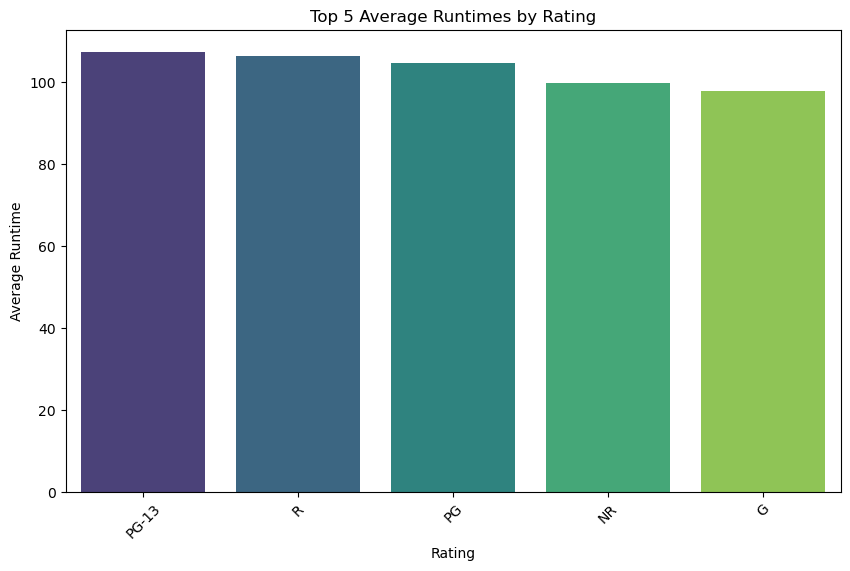

In [307]:
# Display the top 5 results
top_average_runtimes = sorted_average_runtime.head()

# Create a bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_average_runtimes.index, y=top_average_runtimes.values, palette='viridis')
plt.title('Top 5 Average Runtimes by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Runtime')
plt.xticks(rotation=45)
plt.show()

On average PG-13, R and PG films are clock in at around 105 minutes. Next, let's look at which genres is assigned the most common ratings.

In [287]:
#Using similar code from earlier
df3_expanded_genres = df3.assign(genre=df3['genre'].str.split('|')).explode('genre')

#Group by Rating
grouped_by_rating = df3_expanded_genres.groupby('rating')

#Find Most Common Genre by defining a function to find the most common genre
def most_common_genre(x):
    return x.value_counts().idxmax()

# Apply the function to the 'genre' column within each group
most_common_genre_per_rating = grouped_by_rating['genre'].apply(most_common_genre)

print(most_common_genre_per_rating)


rating
G         Drama
NC17     Comedy
NR        Drama
PG        Drama
PG-13     Drama
R         Drama
Name: genre, dtype: object


From here, we can understand that the most common genre for G, NR, PG, PG-13 and R-rated films all share the same genre - Drama.

Let's visualise all this data now!

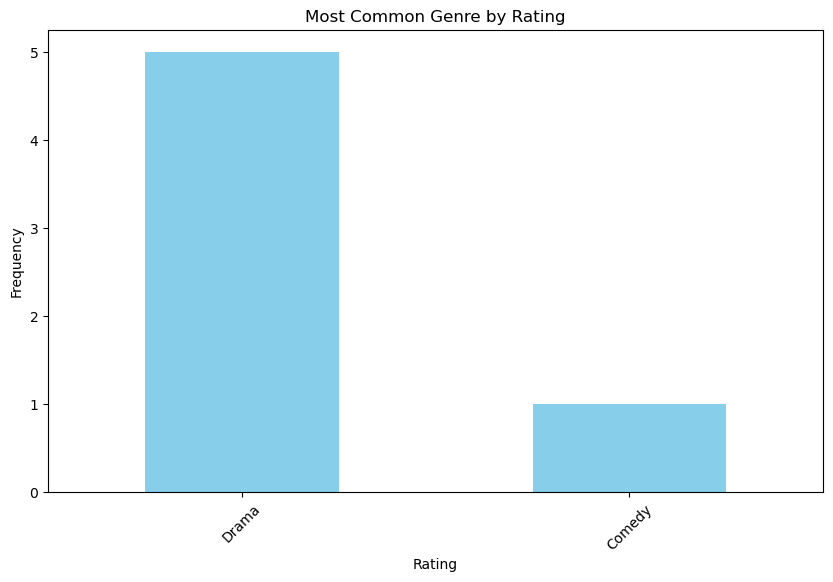

In [308]:
plt.figure(figsize=(10, 6))
most_common_genre_per_rating.value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Common Genre by Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

analyse successful director, writer financially
genre and popularity and writer and director



df1 Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
df2 Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
df3 Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')
df4 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')
df6 Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')